In [20]:

#1.CHOOSING A DATASET : I'VE CHOOSEN Social_Network_AdsN DATASET WHICH FALLS UNDER THE CATEGORY OF NETWORK FIELDS
#--------------------------------------------------------------------------------------------------------------------


In [18]:
# project work flow
#====================
# 1. choose a data set (i choose NETWORK prediction classification data)
# 2. import all the  necessary libraries
# 3. load the data set using pandas module
# 4. feature selection (x,y) and scaling data (standard scalar),split the data
# 5. model creation by invoking algorithm
# 6. model training by fitting (x train & y train) data
# 7. model prediction (ypre)- 'using xtest'/
# 8. calculate perfomace accuracy using output metrics

In [19]:
#2.IMPORTING ALL NECESSARY LIBRARIES
#---------------------------------

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression

In [11]:

#3.LOADING THE DATASET USING PANDAS MODULE
#-----------------------------------------

data=pd.read_csv(r"C:\Users\ELCOT\Desktop\ML\Social_Network_Ads.csv")
data[:5]

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
data.info()
print('')
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB



(400, 3)

In [4]:
#4.FEATURE SELECTION (X,y) AND SCALING DATA (STANDARD SCALAR)
#------------------------------------------------------------

X= data.iloc[:,0:2].values
y= data.iloc[:,2].values

In [5]:
print(X.shape)
print(y.shape)

X[:5]

y[:5]

(400, 2)
(400,)


array([0, 0, 0, 0, 0], dtype=int64)

In [6]:
#DATA SPLITTING 
#--------------

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20,random_state=2)

In [7]:
print('TARINING INPUT SAMPLES COUNT ==>',Xtrain.shape)
print('TRAINING OUTPUT SAMPLES COUNT ==>',ytrain.shape)
print('TESTING INPUT SAMPLE COUNT ==>',Xtest.shape)
print('TESTING OUTPUT SAMPLE COUNT ==>',ytest.shape)

TARINING INPUT SAMPLES COUNT ==> (320, 2)
TRAINING OUTPUT SAMPLES COUNT ==> (320,)
TESTING INPUT SAMPLE COUNT ==> (80, 2)
TESTING OUTPUT SAMPLE COUNT ==> (80,)


In [8]:
#IMPLEMENTING THE ALGORITHM

# NETWORK PREDICTION USING DECISION TREE

In [9]:
#5.model creation by invoking the algorithm
#------------------------------------------

dt= DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=3)


In [10]:
#6.model training by fitting the X and y data(X_train and y_train)
#-----------------------------------------------------------------

dt.fit(Xtrain,ytrain)


DecisionTreeClassifier(max_depth=3, random_state=3)

In [11]:
#7.model prediction (ypre) -'using x_test'
#----------------------------------------

ypre = dt.predict(Xtest)


In [12]:
#8.calculate performance accuracy using output matrix
#----------------------------------------------------

accuracy_score(ytest,ypre)


0.8875

In [13]:
etp= DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=1)

In [14]:
etp.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

In [15]:
ypre_ent= etp.predict(Xtest)

In [16]:
accuracy_score(ytest,ypre_ent)

0.9375

# NETWORK PREDICTION USING LOGISTIC REGRESSION

In [17]:
logreg = LogisticRegression()

In [18]:
logreg.fit(Xtrain,ytrain)

LogisticRegression()

In [19]:
ypre_log = logreg.predict(Xtest)

In [20]:
accuracy_score(ytest,ypre_log)

0.8125

# NETWORK PREDICTION USING NAIVE BAYES CLASSIFIER

In [21]:
gau = GaussianNB()

In [22]:
gau.fit(Xtrain,ytrain)

GaussianNB()

In [23]:
test_gpred=gau.predict(Xtest)

In [24]:
accuracy_score(ytest,test_gpred)

0.85

In [25]:
d=MultinomialNB()

In [26]:
d.fit(Xtrain,ytrain)

MultinomialNB()

In [27]:
test_mulpred = d.predict(Xtest)

In [28]:
accuracy_score(ytest,test_mulpred)

0.6625

In [29]:
compare=pd.DataFrame({'actual output':ytest,'gini_dt':ypre,'entro_dt':ypre_ent,'logreg':ypre_log ,'GaussianNB':test_gpred,'MultinomialNB':test_mulpred})

In [30]:
compare

,actual output,gini_dt,entro_dt,logreg,GaussianNB,MultinomialNB
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,0
...,...,...,...,...,...,...
75,0,0,0,0,0,0
76,1,1,1,1,1,0
77,0,0,0,0,0,0
78,1,1,1,1,1,0


In [31]:
report=pd.DataFrame({'MODEL':['giniDT','entropyDT','logreg','guassNB','multinoNB'],'ACCURACY%':[accuracy_score(ytest,ypre)*100,accuracy_score(ytest,ypre_ent)*100,accuracy_score(ytest,ypre_log)*100,accuracy_score(ytest,test_gpred)*100,accuracy_score(ytest,test_mulpred)*100]})

In [32]:
report

,MODEL,ACCURACY%
0,giniDT,88.75
1,entropyDT,93.75
2,logreg,81.25
3,guassNB,85.00
4,multinoNB,66.25


<Axes: ylabel='ACCURACY%'>

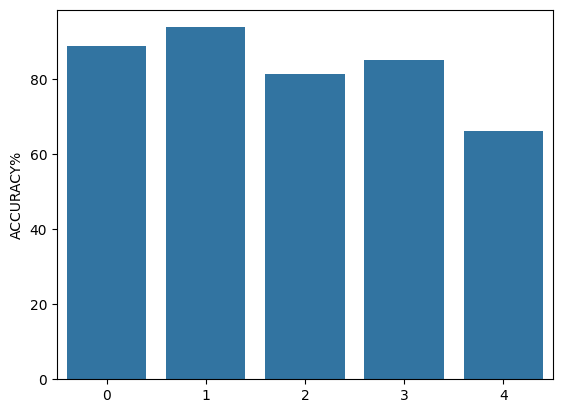

In [33]:
sns.barplot(report['ACCURACY%'])

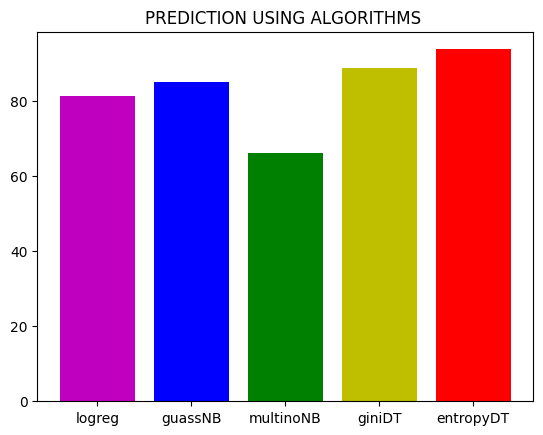

In [37]:
count = [81.25,85.00,66.25,88.75,93.75]
color_code = ['m','b','g','y','r']
plt.bar(['logreg','guassNB','multinoNB','giniDT','entropyDT'],count,color = color_code)
plt.title('PREDICTION USING ALGORITHMS ')
plt.show()

In [22]:
Conclusion: In this study, we investigated the predictive capability of Decision Tree, Logistic Regression,
and Naive Bayes algorithms in assessing Social_Network_Ads based on Age EstimatedSalary and Purchased in
criterion='entropy'outperforms the other methods, achieving an impressive accuracy rating of 93.75%.